In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df =  pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

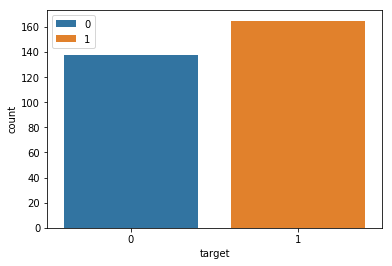

In [6]:
sns.countplot('target',hue='target',data=df,dodge=False)
plt.legend(loc='upper left')

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


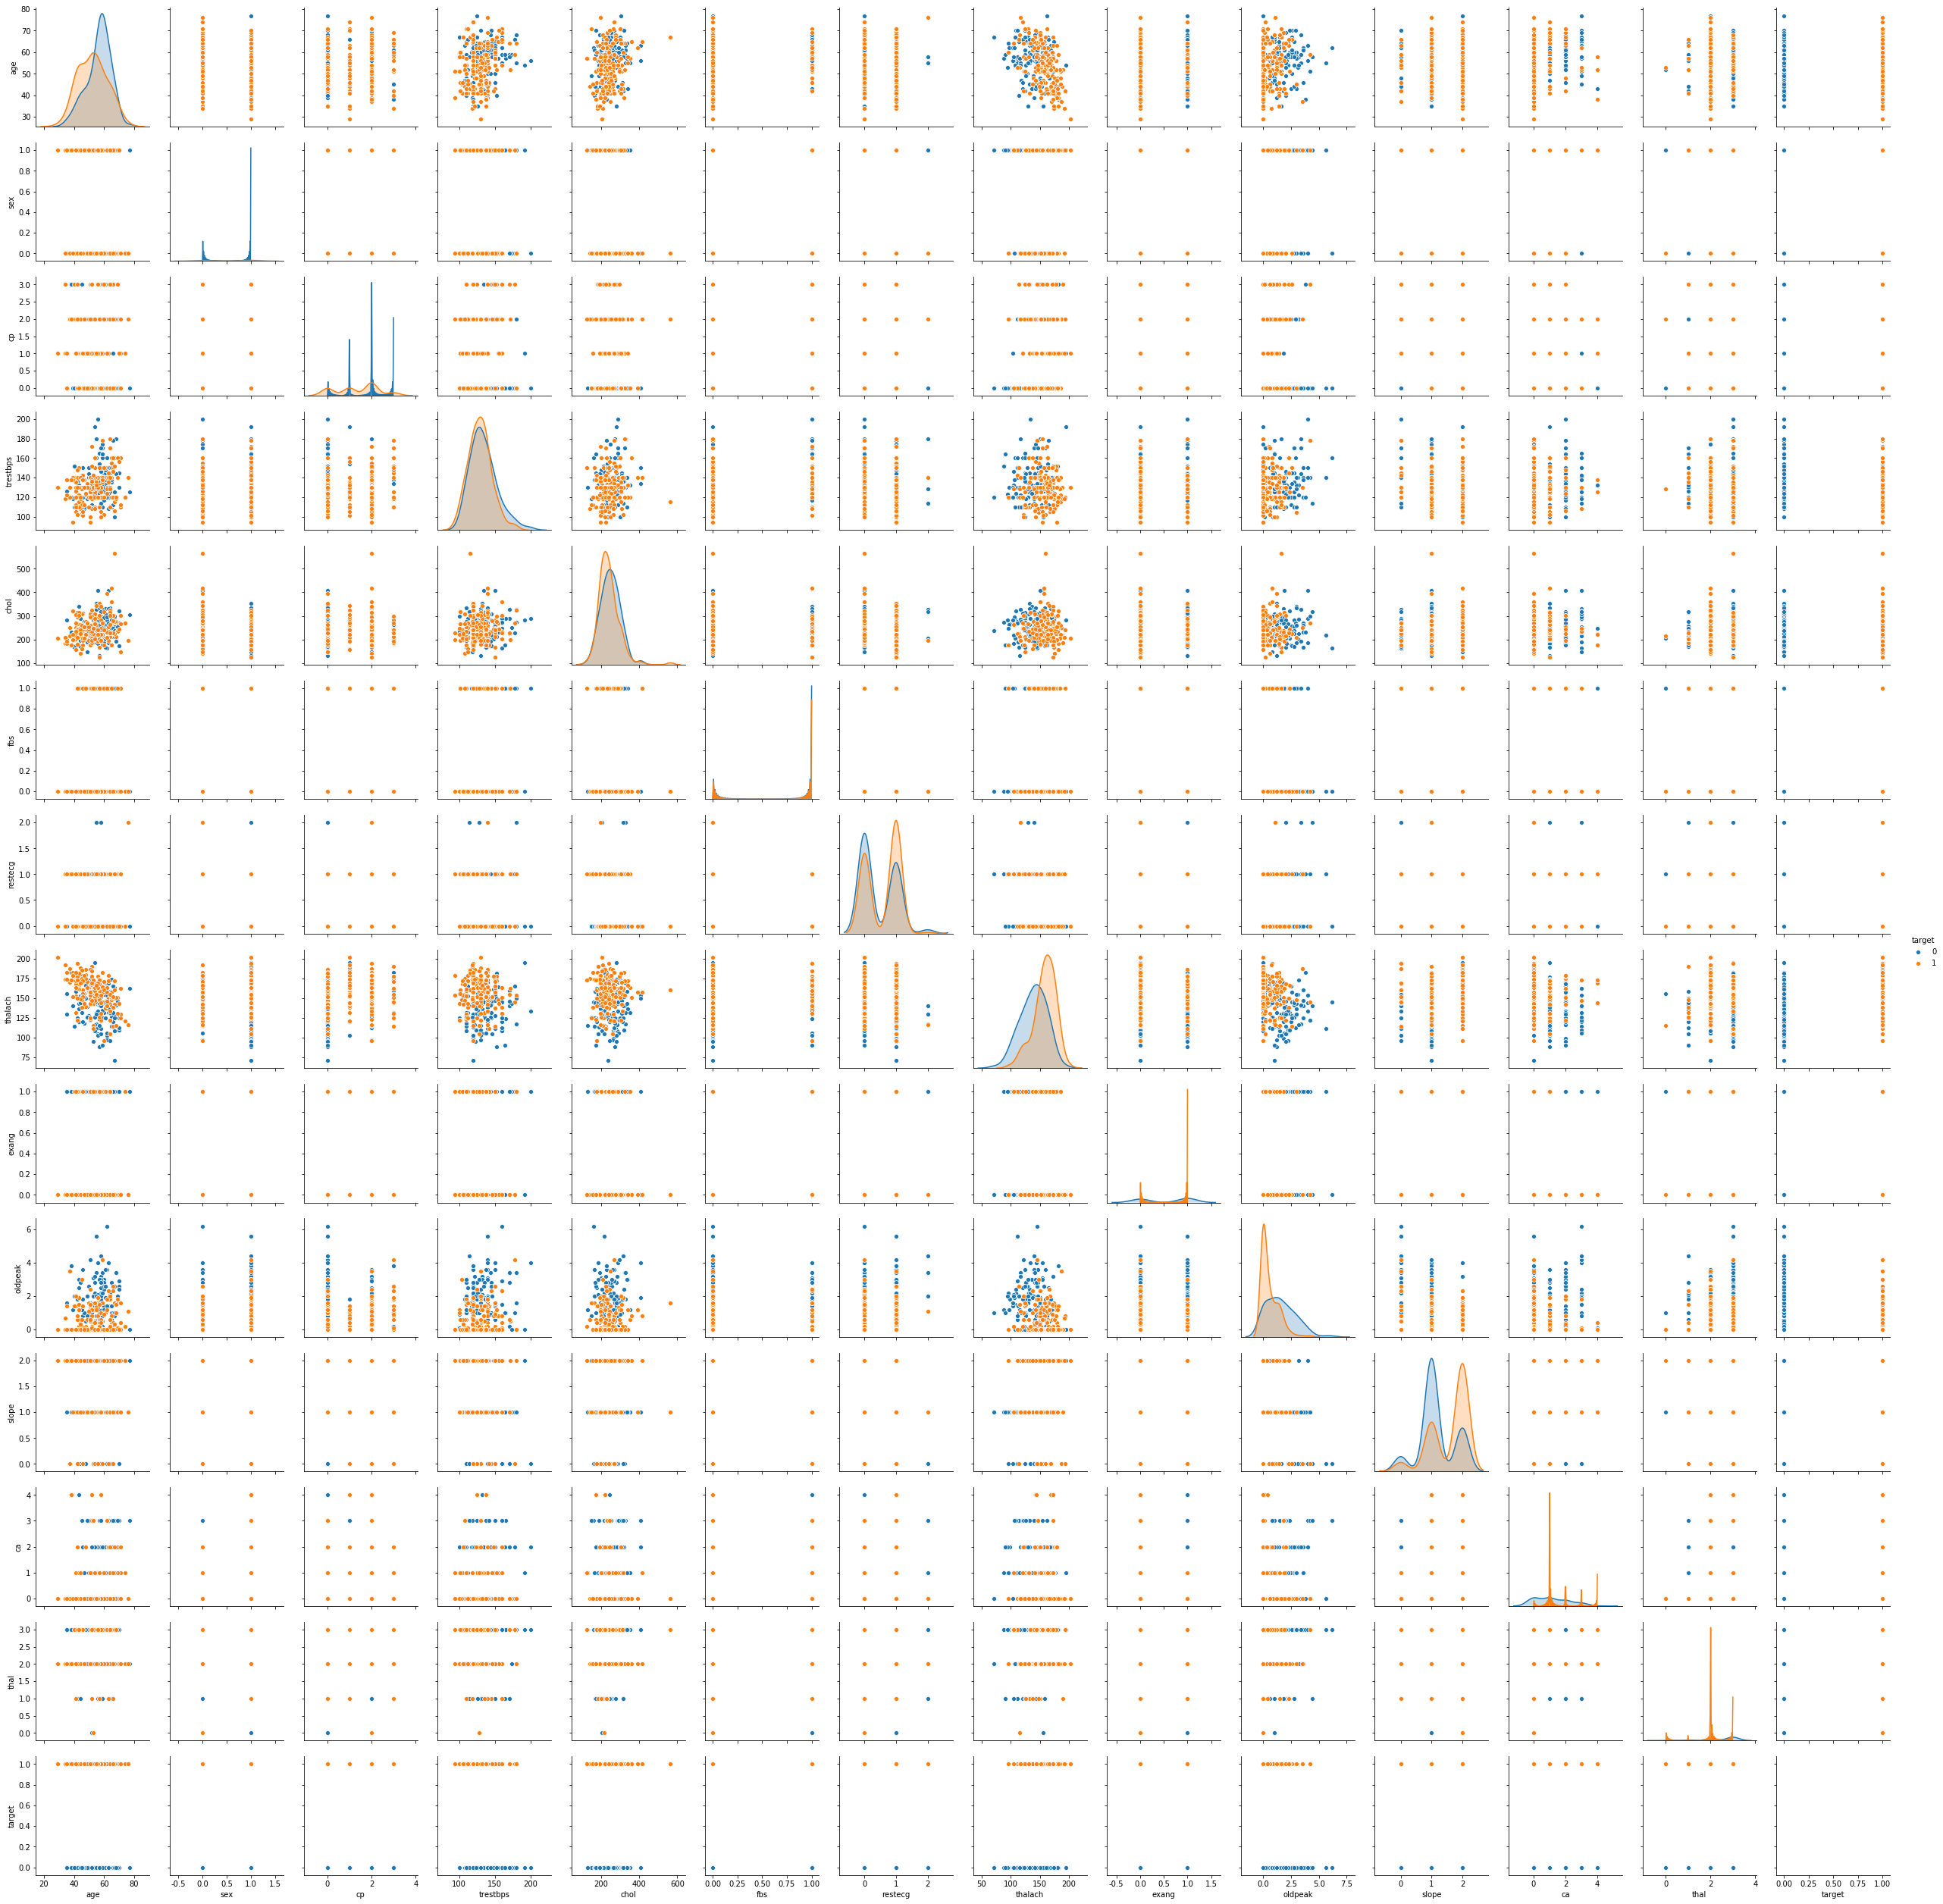

In [7]:
sns.pairplot(df,hue='target')

In [8]:
print('Sex Feature unique values is \n{0}'.format(df['sex'].value_counts()))
print('Fbs Feature unique values is \n{0}'.format(df['fbs'].value_counts()))
print('Restecg Feature unique values is \n{0}'.format(df['restecg'].value_counts()))
print('Exang Feature unique values is \n{0}'.format(df['exang'].value_counts()))
print('Slope Feature unique values is \n{0}'.format(df['slope'].value_counts()))
print('Ca Feature unique values is \n{0}'.format(df['ca'].value_counts()))
print('Thal Feature unique values is \n{0}'.format(df['thal'].value_counts()))

Sex Feature unique values is 
1    207
0     96
Name: sex, dtype: int64
Fbs Feature unique values is 
0    258
1     45
Name: fbs, dtype: int64
Restecg Feature unique values is 
1    152
0    147
2      4
Name: restecg, dtype: int64
Exang Feature unique values is 
0    204
1     99
Name: exang, dtype: int64
Slope Feature unique values is 
2    142
1    140
0     21
Name: slope, dtype: int64
Ca Feature unique values is 
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
Thal Feature unique values is 
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


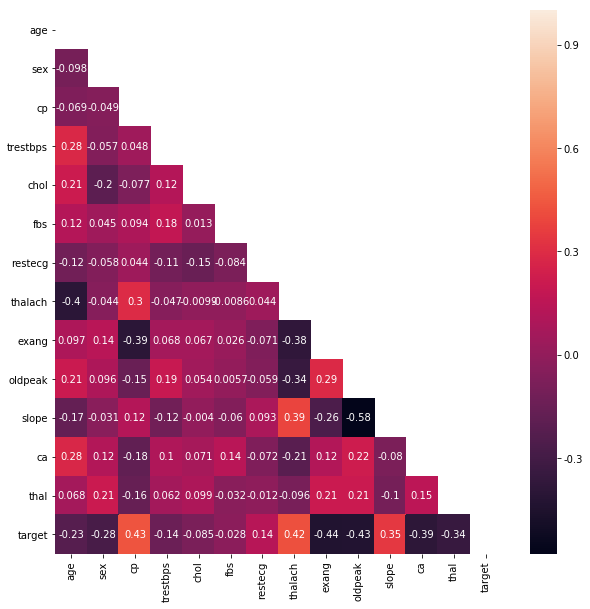

In [9]:
plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,mask=mask,annot=True)

# build model

importance

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',1).values,df['target'].values,test_size=0.2,random_state=42)

In [12]:
ex_tree = ExtraTreesClassifier(max_depth=2,n_estimators=300)
ex_tree.fit(x_train,y_train)
importance =[]
for name,score in zip(df.columns,ex_tree.feature_importances_):
    importance.append([name,score])
importance.sort(key=lambda x:x[1],reverse=True)
for i in importance:
    print(i)

['exang', 0.23480880096279919]
['cp', 0.18421757860485052]
['oldpeak', 0.12547004143892457]
['ca', 0.1053509438511207]
['thal', 0.08904585484263368]
['sex', 0.0882504870971656]
['slope', 0.07669927034802052]
['thalach', 0.057830329062939966]
['age', 0.02353500751845881]
['restecg', 0.0073404270543221805]
['trestbps', 0.0045551048841464955]
['fbs', 0.0016301627707007058]
['chol', 0.0012659915639168689]


## model

In [13]:
voting_clf = VotingClassifier([('lr',LogisticRegression()),
                               ('svm',SVC(C=1,probability=True)),
                               ('random',RandomForestClassifier(max_depth=2)),
                               ('knn',KNeighborsClassifier(n_neighbors=20))],voting='soft')

In [14]:
score = cross_val_score(voting_clf,x_train,y_train,cv=3,verbose=1,scoring='accuracy')
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence 

array([0.80487805, 0.7375    , 0.85      ])

In [15]:
voting_clf.fit(x_train,y_train)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svm', SVC(C=1...i',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [16]:
y_pre = voting_clf.predict(x_test)

In [17]:
accuracy_score(y_test,y_pre)

0.8852459016393442

In [18]:
recall_score(y_test,y_pre)

0.90625

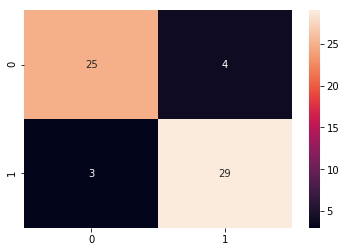

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)

In [20]:
y_pre_pro = voting_clf.predict_proba(x_test)[:,1]

In [21]:
fpr,tpr,th = roc_curve(y_test,y_pre_pro)

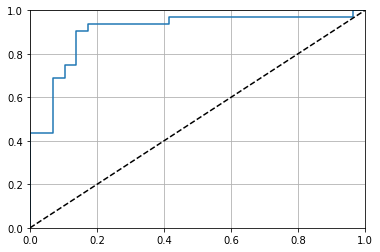

In [22]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim((0,1))
plt.ylim((0,1))
plt.grid(True)

In [23]:
auc(fpr,tpr)

0.9062499999999999

It's good

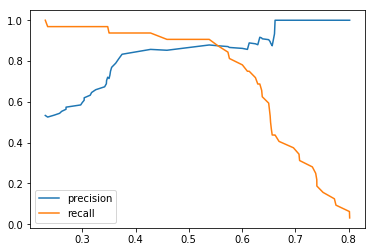

In [24]:
pre,recall,th = precision_recall_curve(y_test,y_pre_pro)
plt.plot(th,pre[:-1],label='precision')
plt.plot(th,recall[:-1],label='recall')
plt.legend()